In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import yfinance as yf

In [8]:
# Step 1: Data Collection - Download stock data from Yahoo Finance
stock_symbol = 'AAPL'  # Example: Apple Inc.
start_date = '2010-01-01'
end_date = '2024-01-01'

data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [9]:
# Step 2: Preprocessing the data
# Use 'Close' prices for prediction
data = data[['Close']]

# Normalize the data to the range [0, 1] using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [10]:
# import ta
# 
# # Ensure 'Close' is a pandas Series (just in case)
# close_prices = data['Close'].iloc[:, 0]  # This guarantees it's a Series
# 
# # Calculate the RSI (Relative Strength Index)
# rsi = ta.momentum.RSIIndicator(close_prices, window=14).rsi()
# data['RSI'] = rsi
# 
# # Print the RSI values
# print(rsi)
# data.head(20)

In [11]:
# # Reset index to move 'Date' from index to a column
# data_reset = data.reset_index()
# 
# # Now you can access 'Date' as a column
# plt.plot(data_reset['Date'], data_reset['RSI'])
# plt.xlabel('Date')
# plt.ylabel('RSI')
# plt.title('RSI Over Time')
# plt.show()


In [12]:
# import ta
# import matplotlib.pyplot as plt
# 
# # Ensure 'Close' is a pandas Series
# close_prices = data['Close'].squeeze()  # .squeeze() ensures it's 1D
# 
# # Calculate Bollinger Bands
# bol = ta.volatility.BollingerBands(close_prices, window=14)
# 
# # Add the bands to the data
# data['lband'] = bol.bollinger_lband()
# data['hband'] = bol.bollinger_hband()
# 
# # Reset the index to access 'Date' column
# data_reset = data.reset_index()
# 
# # Plot the Close, lower band, and upper band
# plt.plot(data_reset['Date'], data_reset['Close'], label='Close Price')
# plt.plot(data_reset['Date'], data_reset['lband'], label='Lower Band', linestyle='--', color="orange")
# plt.plot(data_reset['Date'], data_reset['hband'], label='Upper Band', linestyle='--', color="orange")
# plt.fill_between(data_reset['Date'], data_reset['lband'], data_reset['hband'], alpha=0.2, color="orange")
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.title('Bollinger Bands')
# plt.legend()
# 
# # Save the figure first, before showing it
# plt.savefig('BollingerBands.png')
# 
# # Show the plot
# plt.show()


In [13]:
# import ta
# import matplotlib.pyplot as plt
# 
# # Ensure 'Close' is a pandas Series
# close_prices = data['Close'].squeeze()  # .squeeze() ensures it's 1D
# 
# data['DLR'] = ta.others.DailyLogReturnIndicator(close_prices).daily_log_return()
# data_reset = data.reset_index()
# 
# plt.plot(data_reset['Date'], data_reset['DLR'], label='Daily Log Return')
# plt.show()


In [14]:
# Step 3: Prepare data for LSTM (Create sequences)
train_size = int(len(scaled_data) * 0.8)  # Use 80% for training
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create sequences for LSTM
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Create training and testing datasets
X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

# Reshape the input data to be in the shape (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [15]:
# Step 4: Build the LSTM model
model = Sequential()

# Adding LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\workplace\stock_prediction_using_ANN\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
# Step 5: Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0063
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 5.1310e-04
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 4.7742e-04
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 5.3710e-04
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 4.6986e-04
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 3.8294e-04
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 4.0514e-04
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 3.3596e-04
Epoch 9/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 4.0725e-04
Epoch 10/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 2.9838e-04


In [17]:
# Step 6: Make predictions
predicted_stock_price = model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [18]:
# Step 7: Inverse transform the predictions and test data
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

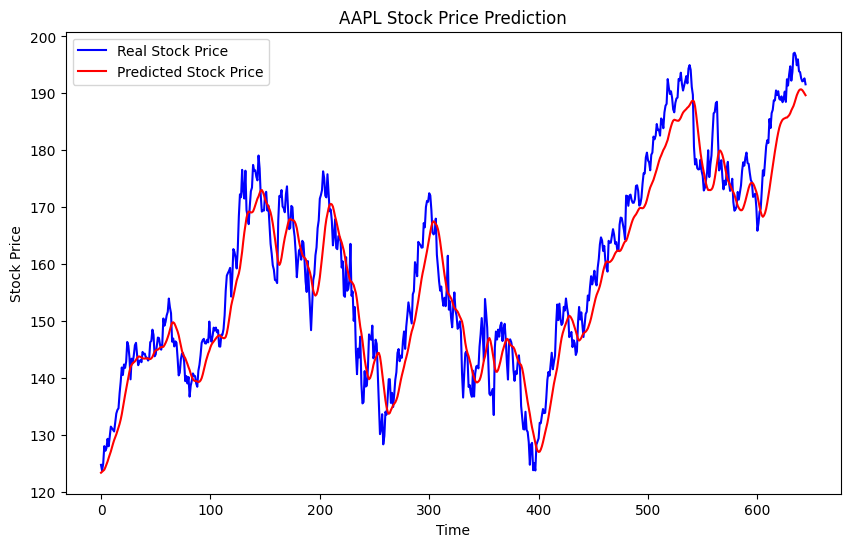

In [19]:
# Step 8: Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(real_stock_price, color='blue', label='Real Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()